In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 16]

In [2]:
sns.set()

## Import data

In [3]:
df = pd.read_csv("stations.csv")

In [4]:
df

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
0,44e2bdb7-13e3-4156-8576-8326cdd20459,bft Tankstelle,NaN,Schellengasse,53,36304,Alsfeld,50.752009,9.279039,1970-01-01 01:00:00+01,{}
1,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.180700,11.460900,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio..."
2,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.695100,7.142760,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
3,cad0d6d1-b55f-4cbd-9511-4371f7944f6e,bft-willer Station 131,bft-willer,Gutenbergstr.,80-86,24118,Kiel,54.333300,10.114200,2014-03-18 16:45:31+01,"{""overrides"":[{""startp"":""2023-04-02 07:00"",""en..."
4,cabdf6c7-2d99-4dac-87d5-30ff0800704c,OMV Tankstelle,OMV,Stuttgarter Str. 54,,72141,Walddorfhäslach,48.588380,9.191510,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
...,...,...,...,...,...,...,...,...,...,...,...
16841,3bf99ee2-9d98-4ee8-86cb-2e6d52bb3184,Freie Tankstelle Schmidt,Freie Tankstelle Auto Schmidt GmbH,Talstraße,51,72218,Wildberg,48.624990,8.749430,2023-03-27 10:01:18+02,"{""openingTimes"":[{""applicable_days"":63,""period..."
16842,4bd58b61-1429-5d97-9013-de73d457f6da,Pöttmes,Hoyer,Rudolf-Diesel-Str.,8,86554,Pöttmes,48.584557,11.107992,2023-03-27 18:01:20+02,{}
16843,2a87fdb0-0c92-55a3-8850-6af1cbdaa374,Itzehoe,Hoyer,Itzehoer Str.,14,25578,Itzehoe,53.889786,9.520660,2023-03-27 18:01:20+02,{}
16844,005056a9-4231-1edc-bb90-ff3980c9c4ff,ENI,AGIP ENI,Bühleck Süd,NaN,34289,Zierenberg,51.381740,9.236582,2023-03-28 18:01:23+02,{}


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16846 entries, 0 to 16845
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               16846 non-null  object 
 1   name               16844 non-null  object 
 2   brand              16141 non-null  object 
 3   street             16844 non-null  object 
 4   house_number       15848 non-null  object 
 5   post_code          16845 non-null  object 
 6   city               16842 non-null  object 
 7   latitude           16846 non-null  float64
 8   longitude          16846 non-null  float64
 9   first_active       16846 non-null  object 
 10  openingtimes_json  16846 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.4+ MB
None


## Data Cleaning

In [6]:
df[df["post_code"] == "nicht"]

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
12004,879f0d23-8a90-4901-11d1-f0a5988e933b,nicht mehr aktiv,nicht mehr aktiv,nicht mehr aktiv,NaN,nicht,mehr aktiv,53.139835,7.567260,2014-03-18 16:45:31+01,{}
14389,b6fbf4e8-7edb-430d-1743-7bece8984ef3,nicht mehr aktiv,nicht mehr aktiv,nicht mehr aktiv,NaN,nicht,mehr aktiv,53.473092,7.481026,2015-11-26 00:00:01+01,{}


In [7]:
df[df["post_code"] == "Nicht"]

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
11601,5c8e5000-e5ac-495b-969e-985e43210286,Nicht mehr aktiv,Nicht mehr aktiv,Nicht mehr aktiv,NaN,Nicht,mehr aktiv,49.781785,11.189532,2014-03-18 16:45:31+01,{}


In [8]:
df[df["post_code"].isna()]

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
14193,4e8ecfc5-5d0d-4463-901b-6b9ff8fee510,01_test,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2015-05-27 00:00:01+02,{}


In [9]:
df = df[df["post_code"] != "nicht"]

In [10]:
df = df[df["post_code"] != "Nicht"]

In [11]:
df = df[~df["post_code"].isna()]

## 5-digit code map

In [12]:
germany_postcodes = gpd.read_file("plz-5stellig.geojson")

In [13]:
germany_postcodes

,plz,note,einwohner,qkm,geometry
0,64743,"Situation unklar, evtl. haben die Häuser Marba...",3,0.082066,"POLYGON ((8.98124 49.60761, 8.98140 49.60730, ..."
1,81248,81248 München,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39484 48.14654..."
2,60315,60315 Frankfurt am Main (FOUR),0,0.017285,"POLYGON ((8.67254 50.11264, 8.67363 50.11152, ..."
3,99331,99331 Geratal,4523,20.207080,"POLYGON ((10.79153 50.69477, 10.79316 50.69306..."
4,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67293 50.11129, ..."
...,...,...,...,...,...
8165,63874,63874 Dammbach,1819,32.868150,"POLYGON ((9.28704 49.86601, 9.28717 49.86584, ..."
8166,63856,63856 Bessenbach,5844,29.855783,"POLYGON ((9.21845 49.96548, 9.21852 49.96548, ..."
8167,63869,63869 Heigenbrücken,2208,8.415089,"POLYGON ((9.30293 50.04595, 9.30347 50.04562, ..."
8168,75339,75339 Höfen an der Enz,1619,9.081549,"POLYGON ((8.55002 48.79175, 8.55222 48.79120, ..."


<AxesSubplot: >

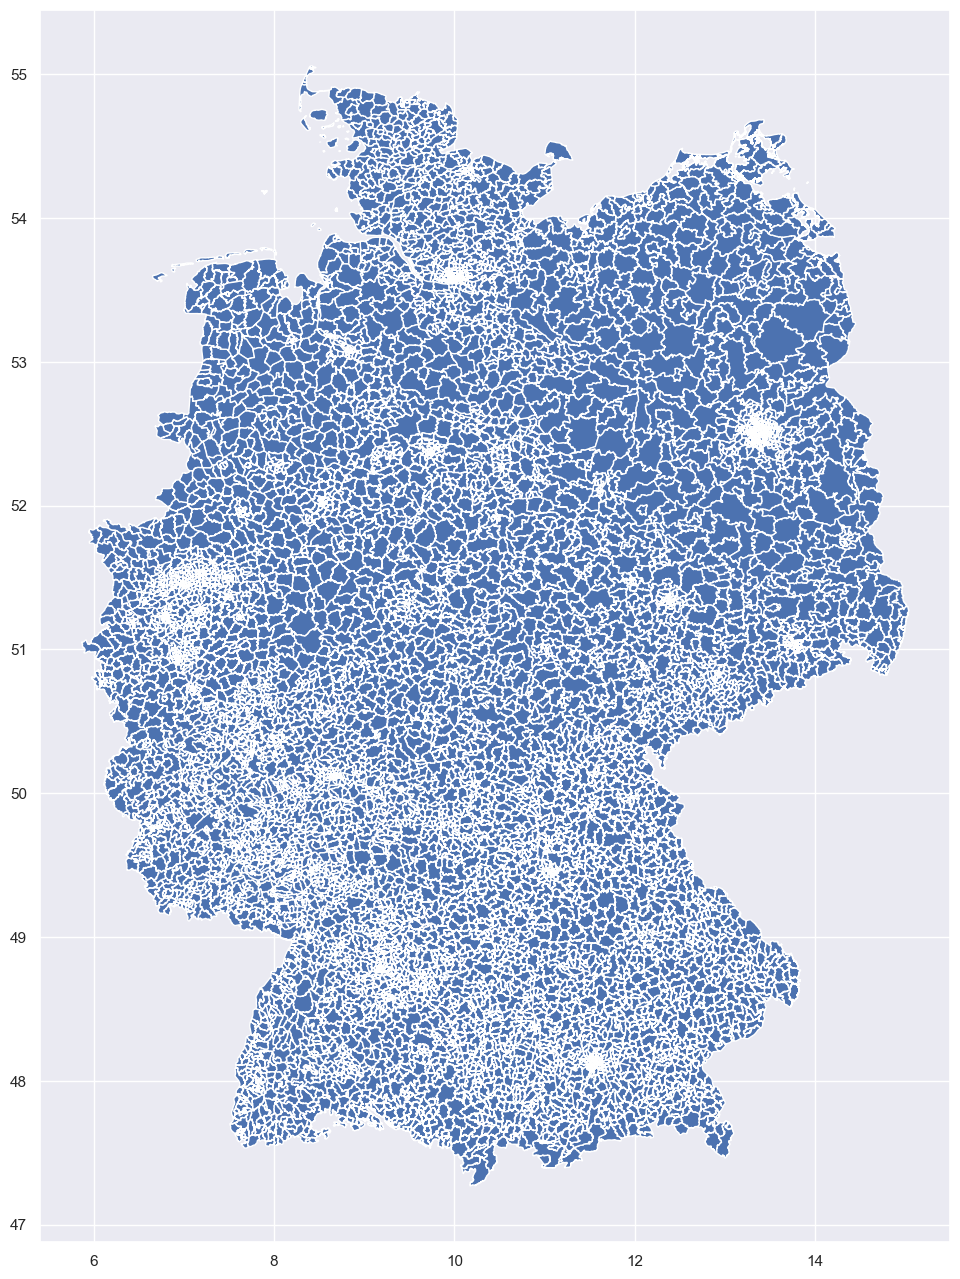

In [14]:
germany_postcodes.plot()

In [15]:
df.groupby("post_code").count().describe()

,uuid,name,brand,street,house_number,city,latitude,longitude,first_active,openingtimes_json
count,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000
mean,2.885881,2.885538,2.765250,2.885709,2.715559,2.885367,2.885881,2.885881,2.885881,2.885881
std,2.279524,2.279431,2.210918,2.279628,2.170134,2.279536,2.279524,2.279524,2.279524,2.279524
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,18.000000,18.000000,16.000000,18.000000,16.000000,18.000000,18.000000,18.000000,18.000000,18.000000


In [16]:
station_count = pd.DataFrame(df.groupby("post_code").count()["uuid"])

In [17]:
station_count

,uuid
post_code,
00000,2
01067,1
01069,1
01097,3
01099,5
...,...
99974,11
99976,1
99986,1


In [18]:
merged_df = germany_postcodes.merge(station_count, how="left", left_on="plz", right_on="post_code")

In [19]:
merged_df

,plz,note,einwohner,qkm,geometry,uuid
0,64743,"Situation unklar, evtl. haben die Häuser Marba...",3,0.082066,"POLYGON ((8.98124 49.60761, 8.98140 49.60730, ...",3.0
1,81248,81248 München,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39484 48.14654...",NaN
2,60315,60315 Frankfurt am Main (FOUR),0,0.017285,"POLYGON ((8.67254 50.11264, 8.67363 50.11152, ...",NaN
3,99331,99331 Geratal,4523,20.207080,"POLYGON ((10.79153 50.69477, 10.79316 50.69306...",1.0
4,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67293 50.11129, ...",NaN
...,...,...,...,...,...,...
8165,63874,63874 Dammbach,1819,32.868150,"POLYGON ((9.28704 49.86601, 9.28717 49.86584, ...",1.0
8166,63856,63856 Bessenbach,5844,29.855783,"POLYGON ((9.21845 49.96548, 9.21852 49.96548, ...",NaN
8167,63869,63869 Heigenbrücken,2208,8.415089,"POLYGON ((9.30293 50.04595, 9.30347 50.04562, ...",NaN
8168,75339,75339 Höfen an der Enz,1619,9.081549,"POLYGON ((8.55002 48.79175, 8.55222 48.79120, ...",1.0


In [20]:
final_df = merged_df.fillna(0)

In [21]:
final_df

,plz,note,einwohner,qkm,geometry,uuid
0,64743,"Situation unklar, evtl. haben die Häuser Marba...",3,0.082066,"POLYGON ((8.98124 49.60761, 8.98140 49.60730, ...",3.0
1,81248,81248 München,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39484 48.14654...",0.0
2,60315,60315 Frankfurt am Main (FOUR),0,0.017285,"POLYGON ((8.67254 50.11264, 8.67363 50.11152, ...",0.0
3,99331,99331 Geratal,4523,20.207080,"POLYGON ((10.79153 50.69477, 10.79316 50.69306...",1.0
4,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67293 50.11129, ...",0.0
...,...,...,...,...,...,...
8165,63874,63874 Dammbach,1819,32.868150,"POLYGON ((9.28704 49.86601, 9.28717 49.86584, ...",1.0
8166,63856,63856 Bessenbach,5844,29.855783,"POLYGON ((9.21845 49.96548, 9.21852 49.96548, ...",0.0
8167,63869,63869 Heigenbrücken,2208,8.415089,"POLYGON ((9.30293 50.04595, 9.30347 50.04562, ...",0.0
8168,75339,75339 Höfen an der Enz,1619,9.081549,"POLYGON ((8.55002 48.79175, 8.55222 48.79120, ...",1.0


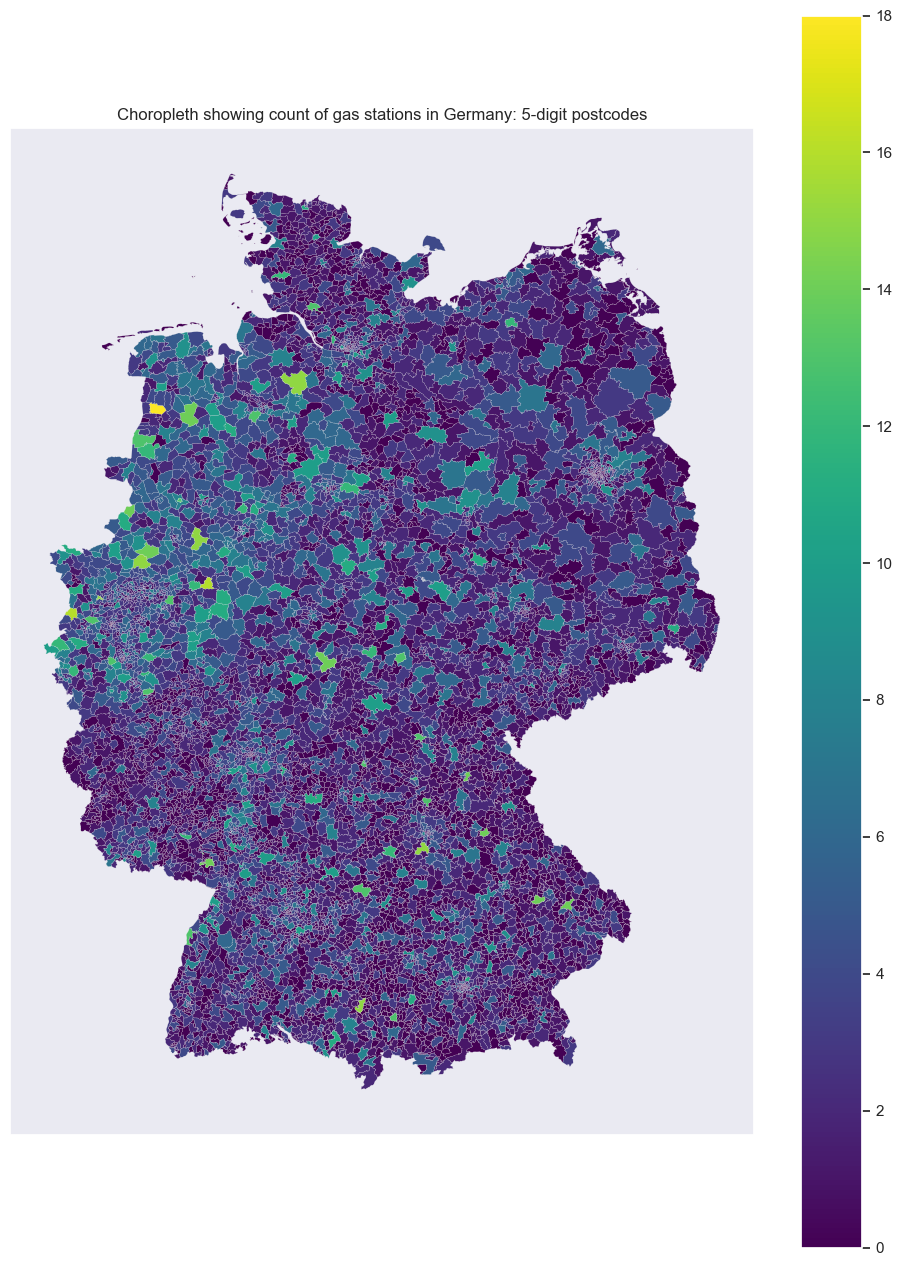

In [22]:
final_df.plot(column="uuid", cmap="viridis", linewidth=0.1, edgecolor='0.9', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Choropleth showing count of gas stations in Germany: 5-digit postcodes")
plt.savefig('5-digit.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.grid()

## 3-digit code map

In [23]:
def reduce_code3(code):

    code = str(code)
    
    if len(code) == 3:
        return code
    
    return code[0:3]

In [24]:
short3df = df.copy()

In [25]:
short3df["post_code"] = short3df["post_code"].apply(reduce_code3)

In [26]:
short3df

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
0,44e2bdb7-13e3-4156-8576-8326cdd20459,bft Tankstelle,NaN,Schellengasse,53,363,Alsfeld,50.752009,9.279039,1970-01-01 01:00:00+01,{}
1,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,809,München,48.180700,11.460900,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio..."
2,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,531,Bonn,50.695100,7.142760,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
3,cad0d6d1-b55f-4cbd-9511-4371f7944f6e,bft-willer Station 131,bft-willer,Gutenbergstr.,80-86,241,Kiel,54.333300,10.114200,2014-03-18 16:45:31+01,"{""overrides"":[{""startp"":""2023-04-02 07:00"",""en..."
4,cabdf6c7-2d99-4dac-87d5-30ff0800704c,OMV Tankstelle,OMV,Stuttgarter Str. 54,,721,Walddorfhäslach,48.588380,9.191510,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
...,...,...,...,...,...,...,...,...,...,...,...
16841,3bf99ee2-9d98-4ee8-86cb-2e6d52bb3184,Freie Tankstelle Schmidt,Freie Tankstelle Auto Schmidt GmbH,Talstraße,51,722,Wildberg,48.624990,8.749430,2023-03-27 10:01:18+02,"{""openingTimes"":[{""applicable_days"":63,""period..."
16842,4bd58b61-1429-5d97-9013-de73d457f6da,Pöttmes,Hoyer,Rudolf-Diesel-Str.,8,865,Pöttmes,48.584557,11.107992,2023-03-27 18:01:20+02,{}
16843,2a87fdb0-0c92-55a3-8850-6af1cbdaa374,Itzehoe,Hoyer,Itzehoer Str.,14,255,Itzehoe,53.889786,9.520660,2023-03-27 18:01:20+02,{}
16844,005056a9-4231-1edc-bb90-ff3980c9c4ff,ENI,AGIP ENI,Bühleck Süd,NaN,342,Zierenberg,51.381740,9.236582,2023-03-28 18:01:23+02,{}


In [27]:
germany_shortcodes = gpd.read_file("plz-3stellig.geojson")

In [28]:
short3df.groupby("post_code").count().describe()

,uuid,name,brand,street,house_number,city,latitude,longitude,first_active,openingtimes_json
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,25.062500,25.059524,24.014881,25.061012,23.583333,25.058036,25.062500,25.062500,25.062500,25.062500
std,13.016176,13.014128,12.401015,13.013950,12.397618,13.015223,13.016176,13.016176,13.016176,13.016176
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,16.000000,15.000000,16.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.000000
50%,24.000000,24.000000,23.000000,24.000000,22.000000,24.000000,24.000000,24.000000,24.000000,24.000000
75%,33.000000,33.000000,32.000000,33.000000,31.000000,33.000000,33.000000,33.000000,33.000000,33.000000
max,83.000000,83.000000,82.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000


In [29]:
station3_count = pd.DataFrame(short3df.groupby("post_code").count()["uuid"])

In [30]:
station3_count

,uuid
post_code,
000,2
010,10
011,27
012,18
013,5
...,...
995,5
996,15
997,31


In [31]:
mergedshort3_df = germany_shortcodes.merge(station3_count, how="left", left_on="plz", right_on="post_code")

In [32]:
mergedshort3_df

,plz,geometry,uuid
0,010,"POLYGON ((13.71974 51.05116, 13.71905 51.05155...",10.0
1,010,"POLYGON ((13.72987 51.02074, 13.72964 51.02023...",10.0
2,011,"POLYGON ((13.65425 51.03426, 13.65417 51.03403...",27.0
3,012,"POLYGON ((13.78940 50.98771, 13.78925 50.98726...",18.0
4,013,"POLYGON ((13.76216 51.04312, 13.76169 51.04329...",5.0
...,...,...,...
1193,978,"POLYGON ((9.39839 50.01475, 9.39827 50.01476, ...",29.0
1194,979,"POLYGON ((9.35699 49.77111, 9.35618 49.77071, ...",41.0
1195,979,"POLYGON ((9.53858 49.63942, 9.53808 49.63897, ...",41.0
1196,985,"POLYGON ((10.40289 50.68198, 10.40146 50.68202...",29.0


In [33]:
finalshort3_df = mergedshort3_df.fillna(0)

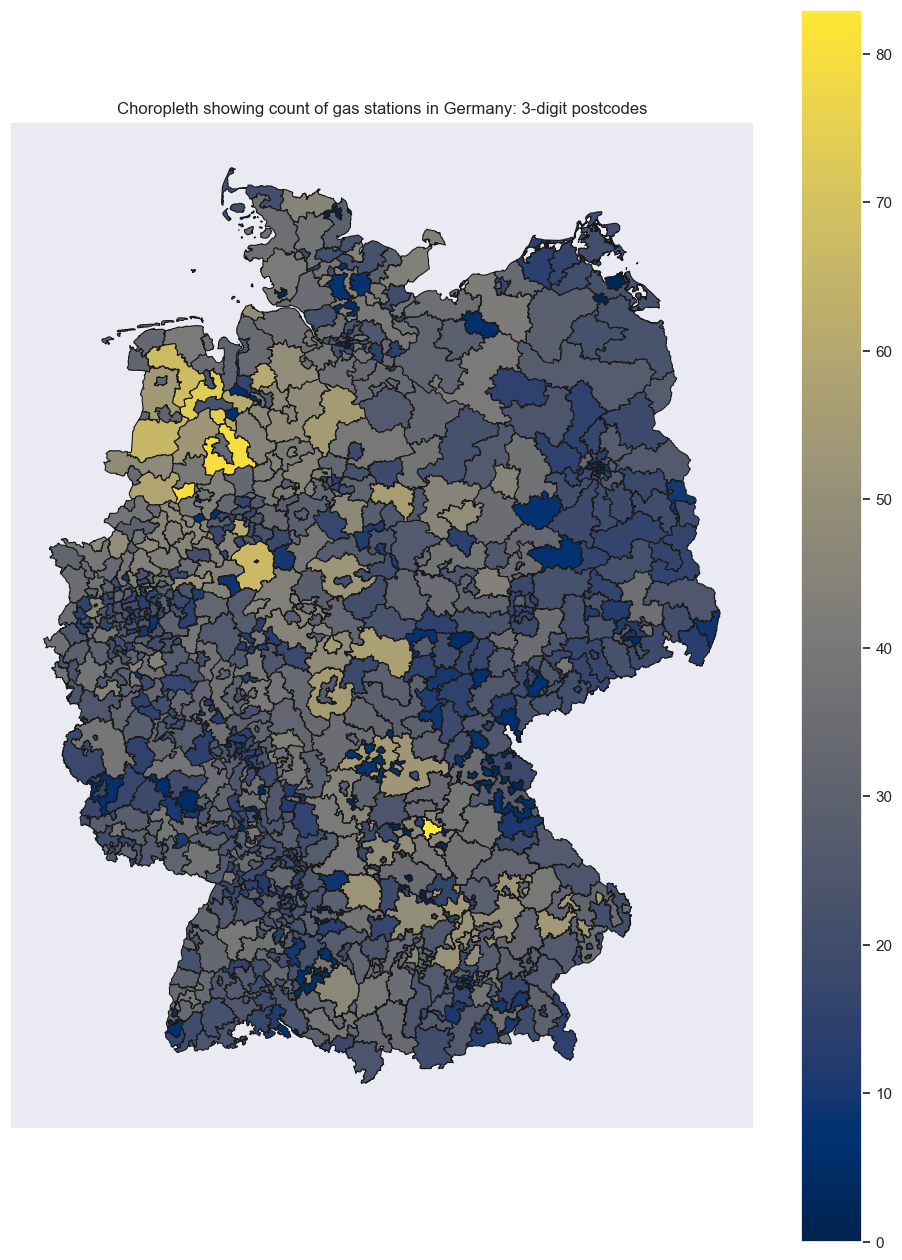

In [34]:
finalshort3_df.plot(column="uuid", cmap="cividis", linewidth=0.8, edgecolor='0.1', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Choropleth showing count of gas stations in Germany: 3-digit postcodes")
plt.savefig('3-digit.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.grid()

## 2-digit code map

In [35]:
def reduce_code2(code):

    code = str(code)
    
    if len(code) == 2:
        return code
    
    return code[0:2]

In [36]:
short2df = df.copy()

In [37]:
short2df["post_code"] = short2df["post_code"].apply(reduce_code2)

In [38]:
short2df

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
0,44e2bdb7-13e3-4156-8576-8326cdd20459,bft Tankstelle,NaN,Schellengasse,53,36,Alsfeld,50.752009,9.279039,1970-01-01 01:00:00+01,{}
1,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80,München,48.180700,11.460900,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio..."
2,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53,Bonn,50.695100,7.142760,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
3,cad0d6d1-b55f-4cbd-9511-4371f7944f6e,bft-willer Station 131,bft-willer,Gutenbergstr.,80-86,24,Kiel,54.333300,10.114200,2014-03-18 16:45:31+01,"{""overrides"":[{""startp"":""2023-04-02 07:00"",""en..."
4,cabdf6c7-2d99-4dac-87d5-30ff0800704c,OMV Tankstelle,OMV,Stuttgarter Str. 54,,72,Walddorfhäslach,48.588380,9.191510,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":31,""period..."
...,...,...,...,...,...,...,...,...,...,...,...
16841,3bf99ee2-9d98-4ee8-86cb-2e6d52bb3184,Freie Tankstelle Schmidt,Freie Tankstelle Auto Schmidt GmbH,Talstraße,51,72,Wildberg,48.624990,8.749430,2023-03-27 10:01:18+02,"{""openingTimes"":[{""applicable_days"":63,""period..."
16842,4bd58b61-1429-5d97-9013-de73d457f6da,Pöttmes,Hoyer,Rudolf-Diesel-Str.,8,86,Pöttmes,48.584557,11.107992,2023-03-27 18:01:20+02,{}
16843,2a87fdb0-0c92-55a3-8850-6af1cbdaa374,Itzehoe,Hoyer,Itzehoer Str.,14,25,Itzehoe,53.889786,9.520660,2023-03-27 18:01:20+02,{}
16844,005056a9-4231-1edc-bb90-ff3980c9c4ff,ENI,AGIP ENI,Bühleck Süd,NaN,34,Zierenberg,51.381740,9.236582,2023-03-28 18:01:23+02,{}


In [39]:
germany_short2codes = gpd.read_file("plz-2stellig.geojson")

In [40]:
short2df.groupby("post_code").count().describe()

,uuid,name,brand,street,house_number,city,latitude,longitude,first_active,openingtimes_json
count,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.00000,96.00000,96.00000
mean,175.43750,175.416667,168.104167,175.427083,165.083333,175.406250,175.43750,175.43750,175.43750,175.43750
std,72.18074,72.158549,67.646835,72.178542,68.724265,72.149199,72.18074,72.18074,72.18074,72.18074
min,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.00000,2.00000
25%,128.75000,128.750000,122.000000,128.750000,124.500000,128.750000,128.75000,128.75000,128.75000,128.75000
50%,174.00000,174.000000,165.000000,174.000000,163.500000,174.000000,174.00000,174.00000,174.00000,174.00000
75%,221.25000,221.250000,211.250000,221.250000,208.500000,221.250000,221.25000,221.25000,221.25000,221.25000
max,407.00000,407.000000,379.000000,407.000000,392.000000,407.000000,407.00000,407.00000,407.00000,407.00000


In [41]:
station2_count = pd.DataFrame(short2df.groupby("post_code").count()["uuid"])

In [42]:
station2_count

,uuid
post_code,
00,2
01,184
02,68
03,54
04,195
...,...
95,134
96,161
97,309


In [43]:
mergedshort2_df = germany_short2codes.merge(station2_count, how="left", left_on="plz", right_on="post_code")

In [44]:
mergedshort2_df

,plz,geometry,uuid
0,01,"POLYGON ((13.21391 51.29429, 13.21372 51.29451...",184
1,02,"POLYGON ((14.15921 51.37961, 14.15550 51.37986...",68
2,03,"POLYGON ((13.51124 51.55132, 13.51032 51.55225...",54
3,04,"POLYGON ((12.18015 51.38653, 12.17930 51.38653...",195
4,04,"POLYGON ((12.18701 51.42080, 12.18584 51.42086...",195
...,...,...,...
182,76,"POLYGON ((7.78613 49.20860, 7.78462 49.20810, ...",220
183,77,"POLYGON ((7.74017 48.23787, 7.74016 48.23787, ...",112
184,78,"POLYGON ((8.13226 48.11802, 8.13146 48.11959, ...",148
185,78,"POLYGON ((8.66538 47.69203, 8.66734 47.69206, ...",148


In [45]:
finalshort2_df = mergedshort2_df.fillna(0)

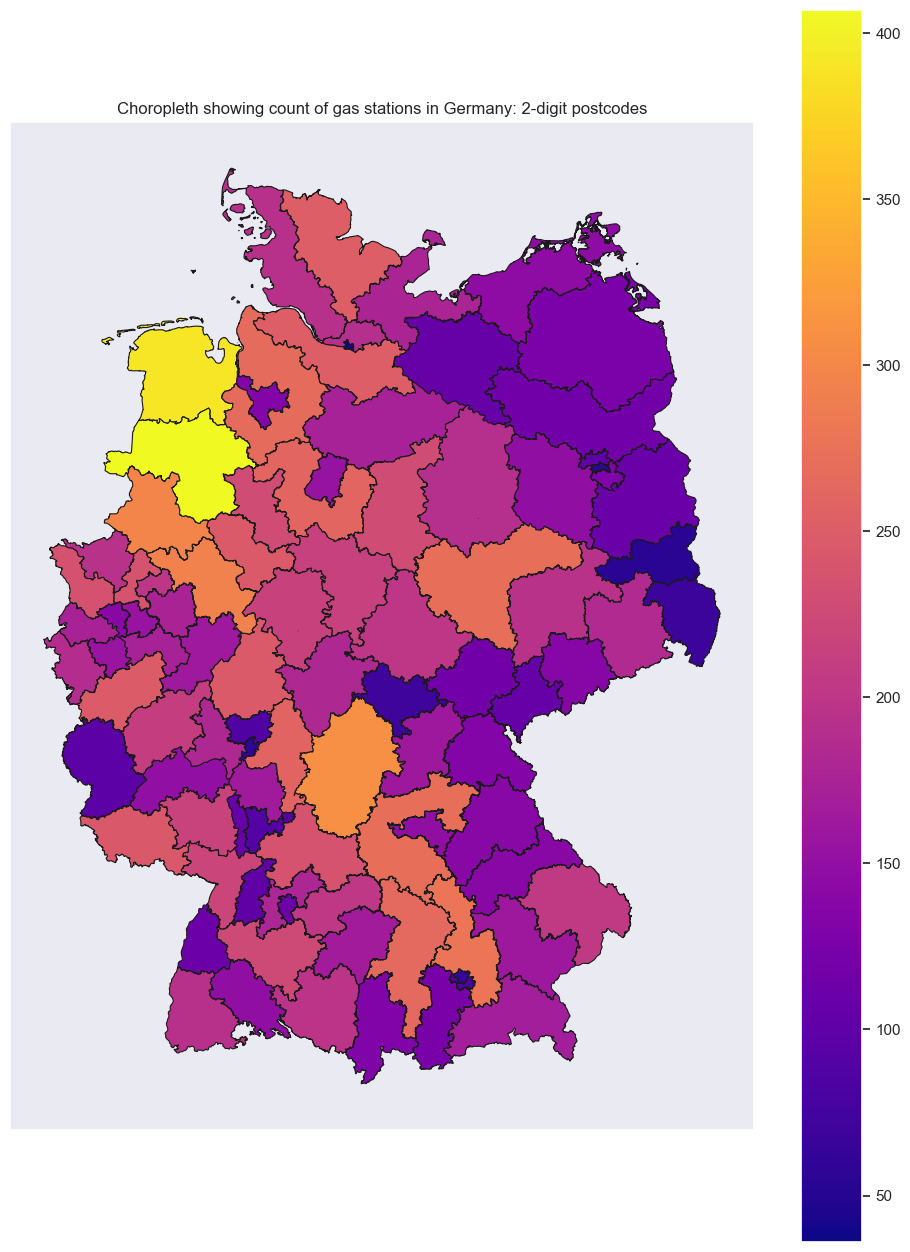

In [48]:
finalshort2_df.plot(column="uuid", cmap="plasma", linewidth=0.8, edgecolor='0.1', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Choropleth showing count of gas stations in Germany: 2-digit postcodes")
plt.savefig('2-digit.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.grid()